In [51]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.api.types import CategoricalDtype

In [53]:
plt.rcParams['figure.figsize'] = (8,8)
pd.set_option('display.max_columns', 500)

In [54]:
from src.data.build_feather_data import cat_cols, id_cols, target

In [55]:
df_train = pd.read_feather('data/train.feather')
df_test = pd.read_feather('data/test.feather')

/home/ec2-user/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:117: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_feather(path, columns=columns, nthreads=int_use_threads)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [56]:
numeric_cols = [col for col in df_train.columns.tolist() if col not in cat_cols + id_cols + [target]]

In [57]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,None,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,None,None,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,None,None,None,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.co

# Feature Engineering
## Count NULLs

In [58]:
df_train['n_nulls'] = df_train.isnull().sum(axis=1)
df_test['n_nulls'] = df_test.isnull().sum(axis=1)

numeric_cols += ['n_nulls']

## Remove Version Numbers

In [59]:
for col in ['id_30', 'id_31']:
    df_train[col+'_clean'] = df_test[col].str.replace(r'[^A-Za-z]', '', regex=True)
    df_test[col+'_clean'] = df_test[col].str.replace(r'[^A-Za-z]', '', regex=True)
    cat_cols += [col+'_clean']

# Convert Categories to Ints for LGB

In [60]:
def cat_to_int(df_train, df_test, col):
    catDtype = CategoricalDtype(categories=df_train[col].value_counts().index.values)
    return df_train[col].astype(catDtype).cat.codes.values, df_test[col].astype(catDtype).cat.codes.values

In [61]:
df_train.loc[:,cat_cols] = df_train[cat_cols].fillna('<UNK>')
df_test.loc[:,cat_cols] = df_test[cat_cols].fillna('<UNK>')

df_train = df_train.fillna(-999)
df_test = df_test.fillna(-999)

In [62]:
cat_cols_encoded = list()
for col in cat_cols:
    df_train[col+'_code'], df_test[col+'_code'] = cat_to_int(df_train, df_test, col)
    cat_cols_encoded.append(col+'_code')

# Modeling

In [63]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from pandas.api.types import CategoricalDtype

In [64]:
features = cat_cols + numeric_cols

In [65]:
N_val = int(df_train.shape[0]*0.05)
df_val = df_train.sort_values(by='TransactionDT').tail(N_val)
df_train_sample = df_train[~df_train.index.isin(df_val.index)]
shuffle_ks = True

In [66]:
df_train.shape[0], df_train_sample.shape[0], df_val.shape[0]

(590540, 561013, 29527)

In [67]:
df_train_sample.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,n_nulls,id_30_clean,id_31_clean,ProductCD_code,card1_code,card2_code,card3_code,card4_code,card5_code,card6_code,addr1_code,addr2_code,P_emaildomain_code,R_emaildomain_code,M1_code,M2_code,M3_code,M4_code,M5_code,M6_code,M7_code,M8_code,M9_code,DeviceType_code,DeviceInfo_code,id_12_code,id_13_code,id_14_code,id_15_code,id_16_code,id_17_code,id_18_code,id_19_code,id_20_code,id_21_code,id_22_code,id_23_code,id_24_code,id_25_code,id_26_code,id_27_code,id_28_code,id_29_code,id_30_code,id_31_code,id_32_code,id_33_code,id_34_code,id_35_code,id_36_code,id_37_code,id_38_code,id_30_clean_code,id_31_clean_code
0,2987000,0,86400,68.5,W,13926,<UNK>,150.0,discover,142.0,credit,315.0,87.0,19.0,-999.0,<UNK>,<UNK>,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,-999.0,13.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,13.0,13.0,-999.0,-999.0,-999.0,0.0,T,T,T,M2,F,T,<UNK>,<UNK>,<UNK>,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.

In [68]:
w = (df_train_sample[target]==0).sum() / (df_train_sample[target]==1).sum() / 5

# Train LGB

In [69]:
train_data_lgb = lgb.Dataset(
    data=df_train_sample[numeric_cols + cat_cols_encoded], 
    label=df_train_sample[target],
    categorical_feature=cat_cols_encoded,
    free_raw_data=False,
)

holdout_data_lgb = lgb.Dataset(
    data=df_val[numeric_cols + cat_cols_encoded], 
    label=df_val[target],
    categorical_feature=cat_cols_encoded,
    free_raw_data=False,
)

In [70]:
lgb_params = {
    'num_leaves': 500,
    'min_data_in_leaf': 106,
    'max_depth': -1,
    'min_child_weight': 0.03,
    'feature_fraction': 0.38,
    'bagging_fraction': 0.42,
    'objective': 'binary',
    'learning_rate': 0.05,
    "boosting_type": "gbdt",
    "bagging_seed": 0,
    "metric": 'auc',
    "verbosity": -1,
    'reg_alpha': 0.4,
    'reg_lambda': 0.7,
    'random_state': 0,
    'scale_pos_weight': w,
}

In [71]:
num_round = 32
bst = lgb.train(lgb_params, train_data_lgb, num_round, valid_sets=[holdout_data_lgb], early_stopping_rounds=100)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/ec2-user/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	valid_0's auc: 0.856209
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.877693
[3]	valid_0's auc: 0.898001
[4]	valid_0's auc: 0.90716
[5]	valid_0's auc: 0.913148
[6]	valid_0's auc: 0.91987
[7]	valid_0's auc: 0.921343
[8]	valid_0's auc: 0.921564
[9]	valid_0's auc: 0.925059
[10]	valid_0's auc: 0.926598
[11]	valid_0's auc: 0.92941
[12]	valid_0's auc: 0.931781
[13]	valid_0's auc: 0.933579
[14]	valid_0's auc: 0.934277
[15]	valid_0's auc: 0.934867
[16]	valid_0's auc: 0.936586
[17]	valid_0's auc: 0.937028
[18]	valid_0's auc: 0.937332
[19]	valid_0's auc: 0.937854
[20]	valid_0's auc: 0.938697
[21]	valid_0's auc: 0.939503
[22]	valid_0's auc: 0.939671
[23]	valid_0's auc: 0.94065
[24]	valid_0's auc: 0.94134
[25]	valid_0's auc: 0.941443
[26]	valid_0's auc: 0.941957
[27]	valid_0's auc: 0.942049
[28]	valid_0's auc: 0.942027
[29]	valid_0's auc: 0.942056
[30]	valid_0's auc: 0.942347
[31]	valid_0's auc: 0.942492
[32]	valid_0's auc: 0.942884
Did not meet early stop

In [72]:
bst.best_score

defaultdict(dict, {'valid_0': {'auc': 0.9428844848262027}})

# Evaluate Performance

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

In [74]:
def plot_roc(y_trues, y_preds, labels, x_max=1.0):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')

In [75]:
y_train_hat_lgb = bst.predict(
    df_train_sample[numeric_cols+cat_cols_encoded].values, num_iteration=bst.best_iteration
)

y_val_hat_lgb = bst.predict(
    df_val[numeric_cols+cat_cols_encoded].values, num_iteration=bst.best_iteration
)

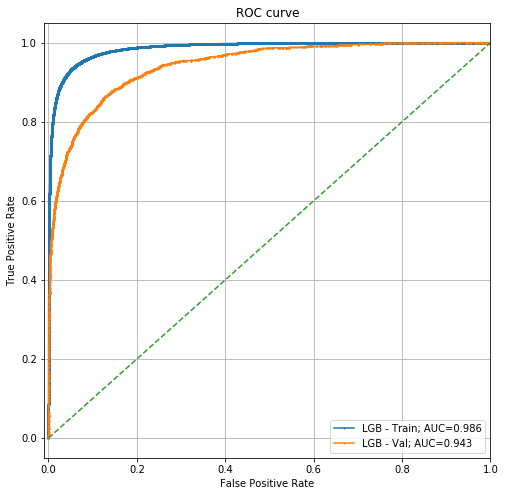

In [76]:
plot_roc(
    [df_train_sample[target], df_val[target]],
    [y_train_hat_lgb, y_val_hat_lgb],
    ['LGB - Train', 'LGB - Val']
)

In [77]:
y_train_embed = bst.predict(
    df_train_sample[numeric_cols+cat_cols_encoded].values, 
    num_iteration=bst.best_iteration,
    pred_leaf=True,
)

In [78]:
y_val_embed = bst.predict(
    df_val[numeric_cols+cat_cols_encoded].values, 
    num_iteration=bst.best_iteration,
    pred_leaf=True,
)

In [82]:
df_train_embed = pd.DataFrame(y_train_embed)
df_val_embed = pd.DataFrame(y_val_embed)

In [83]:
columns = ['c%d'%i for i in range(32)]

In [84]:
df_train_embed.columns = columns
df_val_embed.columns = columns

In [89]:
df_train_embed[target] = df_train_sample[target].values
df_val_embed[target] = df_val[target].values

In [90]:
df_train_embed.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,isFraud
0,292,324,30,313,148,51,458,167,335,3,405,6,289,215,437,49,2,478,146,18,30,343,271,475,110,43,82,178,423,201,291,36,0
1,389,172,247,310,50,200,195,22,7,358,48,437,246,309,110,407,361,247,450,363,347,185,350,36,454,57,426,355,386,299,411,218,0
2,242,173,450,185,120,457,195,167,243,112,353,491,314,459,18,496,340,175,405,179,79,65,353,255,275,469,499,209,412,26,230,95,0
3,488,158,189,333,251,452,253,139,243,58,91,293,73,397,368,232,265,340,46,140,23,359,460,176,139,456,465,128,243,260,79,228,0
4,388,51,316,299,150,414,9,254,221,98,251,55,486,19,69,60,23,426,454,49,328,185,192,83,137,129,131,153,413,492,8,341,0


In [91]:
df_val_embed.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,isFraud
0,33,9,246,18,62,493,29,15,387,33,85,2,41,25,31,121,198,95,41,40,93,140,130,325,171,152,269,275,263,55,254,282,0
1,33,9,246,18,62,493,29,15,387,33,85,2,41,25,31,121,198,95,41,40,93,140,130,325,171,152,269,275,263,55,254,282,0
2,33,9,246,18,62,493,29,15,387,33,85,2,41,25,31,121,198,95,41,40,93,140,130,325,171,152,269,275,263,55,254,282,0
3,33,9,246,18,62,493,29,15,387,33,85,2,41,25,31,121,198,95,41,40,93,140,130,325,171,152,269,275,263,55,254,282,0
4,8,4,318,163,2,317,222,1,256,286,496,435,402,116,77,3,5,320,397,162,25,66,204,85,459,58,439,312,490,352,169,349,0


In [92]:
df_train_embed.to_feather('data/train_embed.feather')
df_val_embed.to_feather('data/val_embed.feather')

# Understand these embeddings

## Nearest Neighbors
Do NNs have similar data?

In [93]:
from sklearn.neighbors import NearestNeighbors

In [94]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(y_val_embed)
distances, indices = nbrs.kneighbors(y_val_embed)

In [95]:
distances[:5,:]

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        , 675.51165793, 686.79909726, 710.34357884,
        723.65115905, 727.45790256, 733.06138897, 737.74182476,
        741.4755559 , 757.67143275]])

In [96]:
row_oi = 0

In [97]:
df_val.iloc[indices[row_oi,:]][[target]+id_cols+cat_cols+numeric_cols].sort_values(by='TransactionID')

,isFraud,TransactionID,TransactionDT,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,DeviceInfo,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,id_30_clean,id_31_clean,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,n_nulls
561039,0,3548039,14858175,S,15775,481.0,150.0,mastercard,102.0,credit,330.0,87.0,<UNK>,yahoo.com,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,desktop,Windows,Found,52.0,-300.0,Found,Found,166.0,<UNK>,633.0,533.0,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,Found,Found,Windows 10,edge 16.0,24.0,1366x768,match_status:2,T,F,T,F,<UNK>,<UNK>,125.0,-999.0,-999.0,5.0,3.0,0.0,3.0,0.0,0.0,0.0,8.0,0.0,3.0,5.0,0.0,61.0,5.0,42.0,42.0,0.0,-999.0,-999.0,256.0,0.0,26.958332,0.958333,253.0,-999.0,-999.0,26.0,256.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,569.0,1044.0,651.0,0.0,27.0,10.0,558.0,940.0,606.0,11.0,77.0,35.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,64738.0,111286.0,72688.0,0.0,2301.0,1052.0,63573.0,101276.0,67979.0,1165.0,7709.0,3657.0,0.0,0.0,0.0,0.0,0.0,558.0,11.0,35.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2401.0,0.0,0.0,0.0,63573.0,67979.0,1165.0,563.0,633.0,0.0,1.0,14.0,0.0,0.0,1.0,7.0,1.0,552.0,895.0,598.0,61.0,11.0,61.0,27.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,64102.0,105058.0,70940.0,0.0,0.0,877.0,75.0,1961.0,465.0,62937.0,96669.0,67131.0,1165.0,6428.0,2932.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,73.0,-999.0,-999.0,-999.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,

# Viz

In [110]:
from sklearn.manifold import TSNE

In [123]:
tsne = TSNE(
    perplexity=20.0,
)

In [124]:
y_val_proj = tsne.fit_transform(y_val_embed)

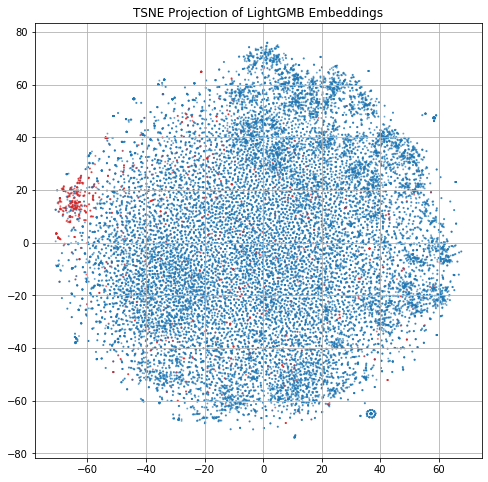

In [126]:
fig, ax = plt.subplots()
colors = ['tab:red' if y else 'tab:blue' for y in df_val[target].values]
labels = ['Fraud' if y else 'Legit' for y in df_val[target].values]
ax.scatter(x=y_val_proj[:,0], y=y_val_proj[:,1], c=colors, s=1, alpha=0.5)
ax.grid()

_ = ax.set_title('TSNE Projection of LightGMB Embeddings')